In [1]:
model_name = 'poly-baseline-no'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/d-no-ns.csv')

In [4]:
# df.columns

In [5]:
# df.head()

In [6]:
df.shape

(1976, 81)

In [7]:
# df.info()

In [8]:
X = df.drop('throughput',axis=1)

In [9]:
X.shape

(1976, 80)

In [10]:
y = df['throughput']

In [11]:
y.shape

(1976,)

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
train_rmse_errs_list = []
test_rmse_errs_list = []

for d in range(1,4): 
    print(d)
    # create transformation poly_converter:X->X'
    pol_converter = PolynomialFeatures(degree=d, include_bias=False)
    # store transformed features
    pol_features = pol_converter.fit_transform(X)
    
    # split the transformed data
    X_train, X_test, y_train, y_test = train_test_split(pol_features, y, test_size=0.33, random_state=42)
    
    # Scale the data
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # create model
    model = LinearRegression()
    # train the model
    model.fit(X_train, y_train)
    
    # predict on training data
    train_pred = model.predict(X_train)
    # predict on test data
    test_pred = model.predict(X_test)
    
    # generate error statistic
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    # append the error statistic to the list
    train_rmse_errs_list.append(train_rmse)
    test_rmse_errs_list.append(test_rmse)
    
train_rmse_errs_ser = pd.Series(train_rmse_errs_list,index=list(range(1,4)))
test_rmse_errs_ser = pd.Series(test_rmse_errs_list,index=list(range(1,4)))

1
2
3


In [18]:
# Error on train data set
train_rmse_errs_ser

1    3.885281e+00
2    1.622798e+00
3    6.200131e-14
dtype: float64

In [19]:
# Error on test data set
test_rmse_errs_ser

1    4.112667e+00
2    9.100770e+10
3    1.923488e+01
dtype: float64

Text(0.5, 0, 'Degree of Polynomial')

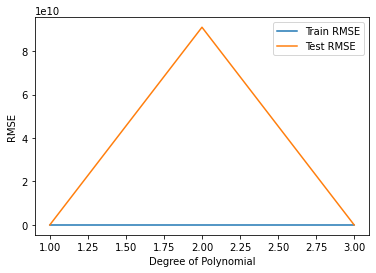

In [20]:
plt.plot(range(1,4), train_rmse_errs_ser[:], label='Train RMSE')
plt.plot(range(1,4), test_rmse_errs_ser[:], label='Test RMSE')


plt.legend(loc='best')
plt.ylabel('RMSE')
plt.xlabel('Degree of Polynomial')

# for even-degree polynomials the error increases dramatically (overfit to train set); the added complexity makes the model fit extremely slow; the error increases for the first two uneneven-degree polynomials (overfit to train set) -> avoid polynomials regresssion! 

# we don't export the model! 

Text(0.5, 0, 'Degree of Polynomial')

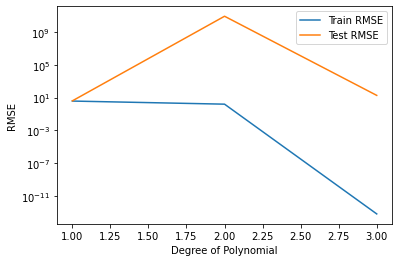

In [21]:
plt.yscale('log')

plt.plot(range(1,4), train_rmse_errs_ser[:], label='Train RMSE')
plt.plot(range(1,4), test_rmse_errs_ser[:], label='Test RMSE')

plt.legend(loc='best')
plt.ylabel('RMSE')
plt.xlabel('Degree of Polynomial')

# Test RMSE drops slower that Train RMSE AND Test RMSE of the 1st-degree polynomial is smaller that the Test RMSE of the 3rd-degree polynomial

In [22]:
err_df = pd.DataFrame(index=['MAE','MSE','RMSE'],columns=['poly-1','poly-2','poly-3'])
err_df.loc['RMSE'] = test_rmse_errs_list

err_df

,poly-1,poly-2,poly-3
MAE,NaN,NaN,NaN
MSE,NaN,NaN,NaN
RMSE,4.11267,9.10077e+10,19.2349


In [23]:
err_df.to_csv(f'./poly-err/{model_name}.csv')

In [24]:
model.coef_

array([-0.05076307,  0.11759909,  0.34284158, ...,  0.        ,
        0.        ,  0.02020285])

In [25]:
# high model complexity

pol_converter.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'x31',
 'x32',
 'x33',
 'x34',
 'x35',
 'x36',
 'x37',
 'x38',
 'x39',
 'x40',
 'x41',
 'x42',
 'x43',
 'x44',
 'x45',
 'x46',
 'x47',
 'x48',
 'x49',
 'x50',
 'x51',
 'x52',
 'x53',
 'x54',
 'x55',
 'x56',
 'x57',
 'x58',
 'x59',
 'x60',
 'x61',
 'x62',
 'x63',
 'x64',
 'x65',
 'x66',
 'x67',
 'x68',
 'x69',
 'x70',
 'x71',
 'x72',
 'x73',
 'x74',
 'x75',
 'x76',
 'x77',
 'x78',
 'x79',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x0 x13',
 'x0 x14',
 'x0 x15',
 'x0 x16',
 'x0 x17',
 'x0 x18',
 'x0 x19',
 'x0 x20',
 'x0 x21',
 'x0 x22',
 'x0 x23',
 'x0 x24',
 'x0 x25',
 'x0 x26',
 'x0 x27',
 'x0 x28',
 'x0 x29',
 'x0 x30',
 'x0 x31',
 'x0 x32',
 'x0 x33',
 'x0 x3

DONE!